In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import poisson
import plotly 
import plotly.plotly as py 
import plotly.figure_factory as ff
from plotly.graph_objs import *
import plotly.graph_objs as go
import cufflinks as cf
plotly.tools.set_credentials_file(username='bluecrayon52', api_key='jidjcpp2L31WYmRfaHZx')


# Asylum Seekers Data Set (Monthly from 1999 to 2016)

In [2]:
df = pd.read_csv("../data/asylum_seekers_monthly.csv", header = 3, low_memory=False, dtype={'Year': str})
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df=df.dropna(subset=['Value'])
# df.dtypes
df.sort_values('Value',ascending=False).head(10)

,Country / territory of asylum/residence,Origin,Year,Month,Value
315117,Germany,Syrian Arab Rep.,2016,February,36860.0
293335,Germany,Syrian Arab Rep.,2015,November,30863.0
315118,Germany,Syrian Arab Rep.,2016,March,30856.0
315116,Germany,Syrian Arab Rep.,2016,January,30261.0
293334,Germany,Syrian Arab Rep.,2015,October,30216.0
315119,Germany,Syrian Arab Rep.,2016,April,28561.0
315123,Germany,Syrian Arab Rep.,2016,August,27315.0
315121,Germany,Syrian Arab Rep.,2016,June,26454.0
293336,Germany,Syrian Arab Rep.,2015,December,25250.0
315122,Germany,Syrian Arab Rep.,2016,July,23979.0


In [3]:
df.keys()

Index([u'Country / territory of asylum/residence', u'Origin', u'Year',
       u'Month', u'Value'],
      dtype='object')

### Top 10 Asylum Seeking Countries 

In [4]:
df_c_sum = df[['Origin', 'Value']].groupby(['Origin']).sum()
temp0 = df_c_sum.sort_values('Value', ascending=False).head(10)
temp0

,Value
Origin,
Syrian Arab Rep.,1027453.0
Afghanistan,952542.0
Iraq,900244.0
Serbia and Kosovo: S/RES/1244 (1999),632975.0
China,421080.0
Russian Federation,398960.0
Iran (Islamic Rep. of),374002.0
Pakistan,342790.0
Somalia,303382.0


In [5]:
labels = temp0.index
values = temp0['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

# Afghanistan 

In [6]:
afg = df[df['Origin']=='Afghanistan']
afg.describe()

,Value
count,5994.000000
mean,158.915916
std,771.702755
min,1.000000
25%,6.000000
50%,28.000000
75%,95.000000
max,20353.000000


In [7]:
afg_mean = int(round(afg.mean()))
afg_median = afg.median()
afg_var = afg.var()
afg_std = afg.std()
afg_mad = abs(afg['Value'] - afg['Value'].median()).median()*1.4826

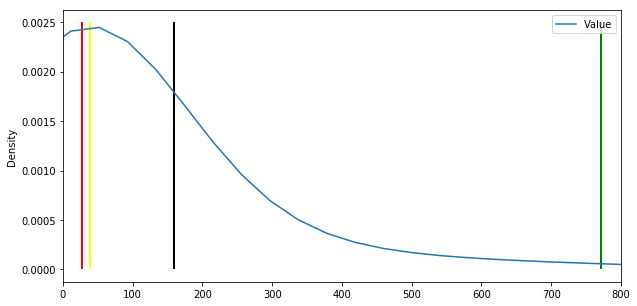

In [8]:
afg.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 800))


plt.vlines(afg_mean,     # Plot black line at mean
           ymin=0, 
           ymax=0.0025,
           linewidth=2.0)

plt.vlines(afg_median,   # Plot red line at median
           ymin=0, 
           ymax=0.0025,
           linewidth=2.0,
           color="red")

# plt.vlines(afg_var,   # Plot blue line at variance 
#            ymin=0, 
#            ymax=0.0022,
#            linewidth=2.0,
#            color="blue")

plt.vlines(afg_std,   # Plot green line at standard deviation
           ymin=0, 
           ymax=0.0025,
           linewidth=2.0,
           color="green")

plt.vlines(afg_mad,   # Plot  yellow line at median absolute deviation
           ymin=0, 
           ymax=0.0025,
           linewidth=2.0,
           color="yellow")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ac81850>]], dtype=object)

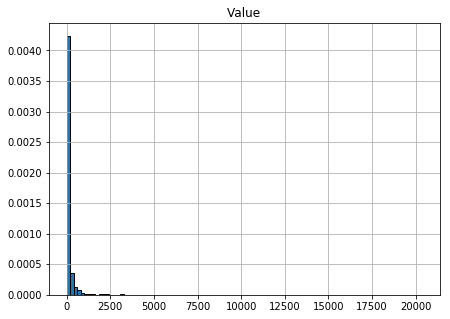

In [9]:
afg.hist(normed=True, bins=100, ec='black', figsize= (7,5))

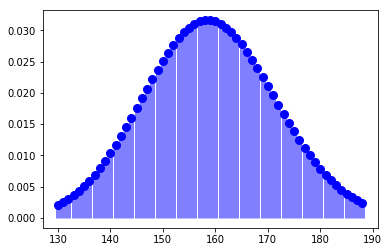

In [10]:
fig, ax = plt.subplots(1, 1)
mu = afg_mean
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

### Top 10 Countries of Asylum for Afghan Refugees 

In [11]:
afg_asy_sum = afg[['Country / territory of asylum/residence', 'Value']].groupby(['Country / territory of asylum/residence']).sum()
temp = afg_asy_sum.sort_values('Value', ascending=False).head(10)
temp

,Value
Country / territory of asylum/residence,
Germany,230313.0
Turkey,166134.0
Austria,87724.0
Hungary,82616.0
Sweden,68861.0
United Kingdom of Great Britain and Northern Ireland,59068.0
Netherlands,28133.0
Belgium,24220.0
Bulgaria,23653.0


In [12]:
labels = temp.index
values = temp['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

### Top 10 Years of Refugee Traffic out of Afghanistan

In [13]:
afg_yr = afg[['Year','Month','Value']].groupby(['Year']).sum()
temp_a = afg_yr.sort_values('Value', ascending=False).head(10)
temp_a

,Value
Year,
2015,258518.0
2016,220820.0
2014,59271.0
2001,53203.0
2012,47520.0
2011,36356.0
2013,36115.0
2017,35912.0
2000,31609.0


In [14]:
labels = temp_a.index
values = temp_a['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

# Iraq

In [15]:
irq = df[df['Origin']=='Iraq'] 
irq.describe()

,Value
count,6243.000000
mean,144.200545
std,581.263320
min,1.000000
25%,7.000000
50%,25.000000
75%,89.000000
max,12009.000000


In [16]:
irq_mean = int(round(irq.mean()))
irq_median = irq.median()
irq_var = irq.var()
irq_std = irq.std()
irq_mad = abs(irq['Value'] - irq['Value'].median()).median()*1.4826

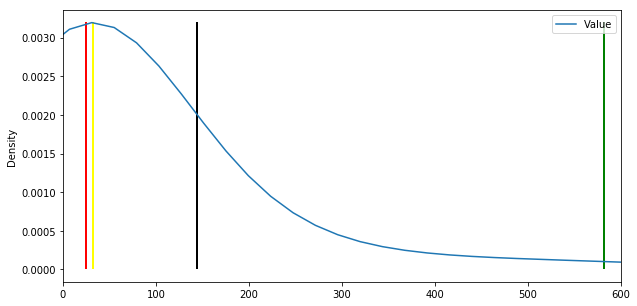

In [17]:
irq.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 600))

plt.vlines(irq_mean,     # Plot black line at mean
           ymin=0, 
           ymax=0.0032,
           linewidth=2.0)

plt.vlines(irq_median,   # Plot red line at median
           ymin=0, 
           ymax=0.0032,
           linewidth=2.0,
           color="red")

plt.vlines(irq_std,   # Plot green line at standard deviation
           ymin=0, 
           ymax=0.0032,
           linewidth=2.0,
           color="green")

plt.vlines(irq_mad,   # Plot  yellow line at median absolute deviation
           ymin=0, 
           ymax=0.0032,
           linewidth=2.0,
           color="yellow")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ef4bb90>]], dtype=object)

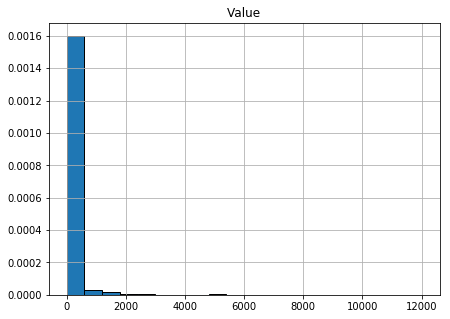

In [18]:
irq.hist(normed=True, bins=20, ec='black', figsize= (7,5))

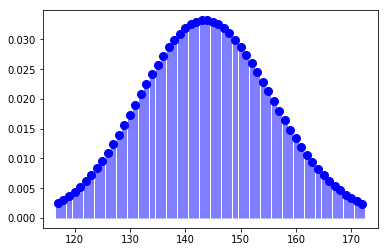

In [19]:
fig, ax = plt.subplots(1, 1)
mu = irq_mean
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

### Top 10 Countries of Asylum for Iraqi Refugees 

In [20]:
irq_asy_sum = irq[['Country / territory of asylum/residence', 'Value']].groupby(['Country / territory of asylum/residence']).sum()
temp2 = irq_asy_sum.sort_values('Value', ascending=False).head(10)
temp2

,Value
Country / territory of asylum/residence,
Germany,233882.0
Turkey,215463.0
Sweden,92132.0
United Kingdom of Great Britain and Northern Ireland,55162.0
Netherlands,36911.0
Austria,33944.0
Finland,28936.0
Greece,22813.0
Belgium,22623.0


In [21]:
labels = temp2.index
values = temp2['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

### Top 10 Years of Refugee Traffic out of Iraq

In [22]:
irq_yr = irq[['Year','Month','Value']].groupby(['Year']).sum()
temp_b = irq_yr.sort_values('Value', ascending=False).head(10)
temp_b

,Value
Year,
2015,186617.0
2016,157177.0
2014,68591.0
2002,51950.0
2001,50123.0
2007,44791.0
2008,40299.0
2000,39965.0
2013,37333.0


In [23]:
labels = temp_b.index
values = temp_b['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

# Serbia and Kosovo

In [24]:
serb = df[df['Origin']=='Serbia and Kosovo: S/RES/1244 (1999)'] 
serb.describe()

,Value
count,4912.000000
mean,128.862989
std,490.003124
min,1.000000
25%,5.000000
50%,21.000000
75%,100.000000
max,13451.000000


In [25]:
serb_mean = int(round(serb.mean()))
serb_median = serb.median()
serb_var = serb.var()
serb_std = serb.std()
serb_mad = abs(serb['Value'] - serb['Value'].median()).median()*1.4826

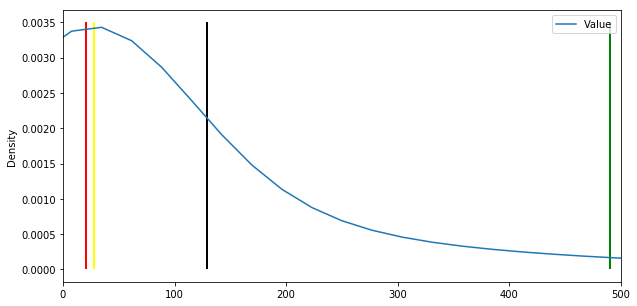

In [26]:
serb.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 500))
plt.vlines(serb_mean,     # Plot black line at mean
           ymin=0, 
           ymax=0.0035,
           linewidth=2.0)

plt.vlines(serb_median,   # Plot red line at median
           ymin=0, 
           ymax=0.0035,
           linewidth=2.0,
           color="red")

plt.vlines(serb_std,   # Plot green line at standard deviation
           ymin=0, 
           ymax=0.0035,
           linewidth=2.0,
           color="green")

plt.vlines(serb_mad,   # Plot  yellow line at median absolute deviation
           ymin=0, 
           ymax=0.0035,
           linewidth=2.0,
           color="yellow")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1100d6c10>]], dtype=object)

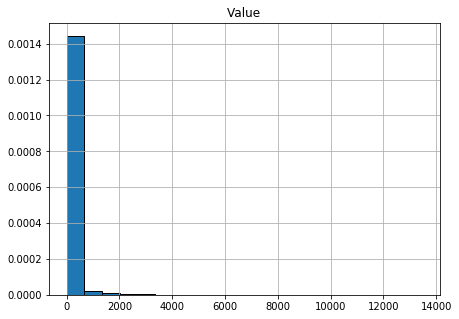

In [27]:
serb.hist(normed=True, bins=20, ec='black', figsize= (7,5))

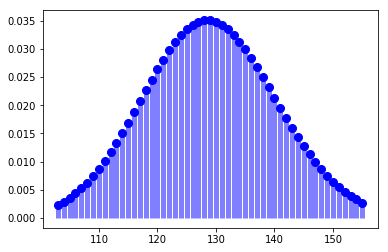

In [28]:
fig, ax = plt.subplots(1, 1)
mu = serb_mean
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

### Top 10 Countries of Asylum for Serbian or Kosovan Refugees 

In [29]:
serb_asy_sum = serb[['Country / territory of asylum/residence', 'Value']].groupby(['Country / territory of asylum/residence']).sum()
temp3 = serb_asy_sum.sort_values('Value', ascending=False).head(10)
temp3

,Value
Country / territory of asylum/residence,
Germany,204735.0
France,63950.0
Hungary,63687.0
Sweden,57347.0
Switzerland,53355.0
Belgium,42071.0
Austria,40200.0
United Kingdom of Great Britain and Northern Ireland,30412.0
Norway,15726.0


In [30]:
labels = temp3.index
values = temp3['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

### Top 10 Years of Refugee Traffic out of Serbia and Kosovo

In [31]:
serb_yr = serb[['Year','Month','Value']].groupby(['Year']).sum()
temp_c = serb_yr.sort_values('Value', ascending=False).head(10)
temp_c

,Value
Year,
1999,115491.0
2015,88038.0
2014,55442.0
2000,46454.0
2013,34615.0
2002,32147.0
2010,30550.0
2001,27521.0
2003,25635.0


In [32]:
labels = temp_c.index
values = temp_c['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

# Syria 

In [33]:
syr = df[df['Origin']=='Syrian Arab Rep.'] 
syr.describe()

,Value
count,5544.000000
mean,185.327020
std,1494.966385
min,1.000000
25%,3.000000
50%,11.000000
75%,49.000000
max,36860.000000


In [34]:
syr_mean = int(round(syr.mean()))
syr_median = syr.median()
syr_var = syr.var()
syr_std = syr.std()
syr_mad = abs(syr['Value'] - syr['Value'].median()).median()*1.4826

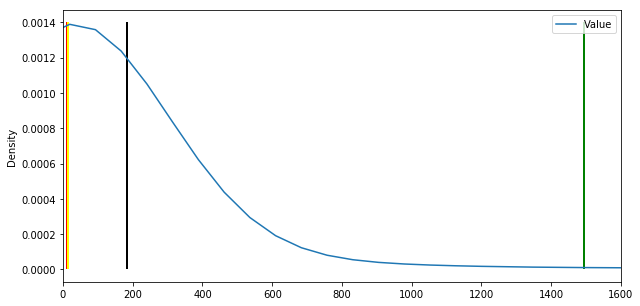

In [35]:
syr.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 1600))
plt.vlines(syr_mean,     # Plot black line at mean
           ymin=0, 
           ymax=0.0014,
           linewidth=2.0)

plt.vlines(syr_median,   # Plot red line at median
           ymin=0, 
           ymax=0.0014,
           linewidth=2.0,
           color="red")

plt.vlines(syr_std,   # Plot green line at standard deviation
           ymin=0, 
           ymax=0.0014,
           linewidth=2.0,
           color="green")

plt.vlines(syr_mad,   # Plot  yellow line at median absolute deviation
           ymin=0, 
           ymax=0.0014,
           linewidth=2.0,
           color="yellow")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bdda910>]], dtype=object)

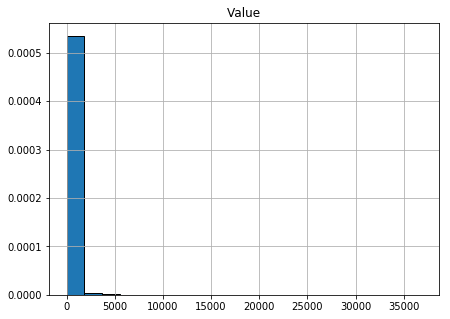

In [36]:
syr.hist(normed=True, bins=20, ec='black', figsize= (7,5))

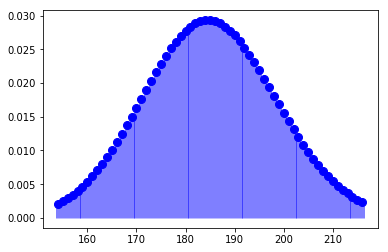

In [37]:
fig, ax = plt.subplots(1, 1)
mu = syr_mean
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

### Top 10 Countries of Asylum for Syrian Refugees 

In [38]:
syr_asy_sum = syr[['Country / territory of asylum/residence', 'Value']].groupby(['Country / territory of asylum/residence']).sum()
temp4 = syr_asy_sum.sort_values('Value', ascending=False).head(10)
temp4

,Value
Country / territory of asylum/residence,
Germany,517479.0
Sweden,117329.0
Hungary,77190.0
Austria,49289.0
Netherlands,37985.0
Denmark,22202.0
Belgium,21844.0
Bulgaria,20344.0
France,18331.0


In [39]:
labels = temp4.index
values = temp4['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

### Top 10 Years of Refugee Traffic out of Syria

In [40]:
syr_yr = syr[['Year','Month','Value']].groupby(['Year']).sum()
temp_d = syr_yr.sort_values('Value', ascending=False).head(10)
temp_d

,Value
Year,
2015,382513.0
2016,321260.0
2014,148729.0
2013,56334.0
2017,31651.0
2012,25217.0
2011,8739.0
2007,5503.0
2000,5189.0


In [41]:
labels = temp_d.index
values = temp_d['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

In [42]:
china = df[df['Origin']=='China'] 
china.describe()

,Value
count,5059.000000
mean,83.233841
std,188.657493
min,1.000000
25%,3.000000
50%,14.000000
75%,85.000000
max,1914.000000


In [43]:
china_mean = int(round(china.mean()))
china_median = china.median()
china_var = china.var()
china_std = china.std()
china_mad = abs(china['Value'] - china['Value'].median()).median()*1.4826

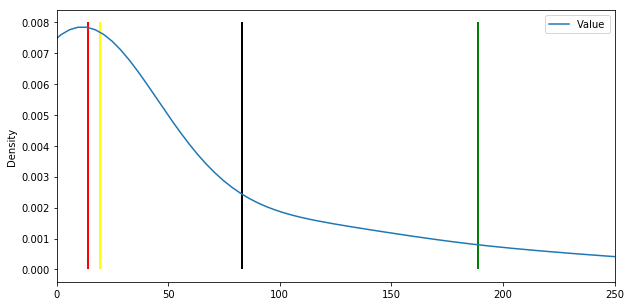

In [44]:
china.plot(kind="density",
                figsize=(10,5),
                xlim=(0, 250))

plt.vlines(china_mean,     # Plot black line at mean
           ymin=0, 
           ymax=0.008,
           linewidth=2.0)

plt.vlines(china_median,   # Plot red line at median
           ymin=0, 
           ymax=0.008,
           linewidth=2.0,
           color="red")

plt.vlines(china_std,   # Plot green line at standard deviation
           ymin=0, 
           ymax=0.008,
           linewidth=2.0,
           color="green")

plt.vlines(china_mad,   # Plot  yellow line at median absolute deviation
           ymin=0, 
           ymax=0.008,
           linewidth=2.0,
           color="yellow")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bf50290>]], dtype=object)

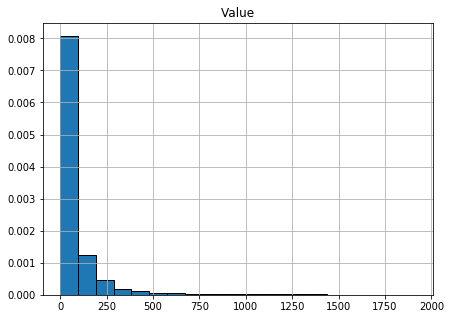

In [45]:
china.hist(normed=True, bins=20, ec='black', figsize= (7,5))

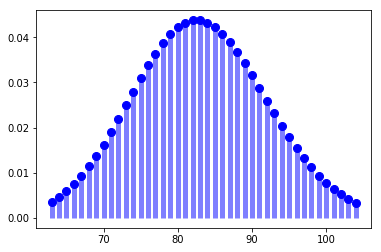

In [46]:
fig, ax = plt.subplots(1, 1)
mu = china_mean
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

### Top 10 Countries of Asylum for Chinese Refugees 

In [47]:
china_asy_sum = china[['Country / territory of asylum/residence', 'Value']].groupby(['Country / territory of asylum/residence']).sum()
temp5 = china_asy_sum.sort_values('Value', ascending=False).head(10)
temp5

,Value
Country / territory of asylum/residence,
USA (INS/DHS),168536.0
USA (EOIR),49591.0
France,49581.0
United Kingdom of Great Britain and Northern Ireland,34557.0
Canada,31127.0
Australia,22643.0
Germany,15700.0
Netherlands,7602.0
Switzerland,6055.0


In [48]:
labels = temp5.index
values = temp5['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

### Top 10 Years of Refugee Traffic out of China

In [49]:
china_yr = china[['Year','Month','Value']].groupby(['Year']).sum()
temp_e = china_yr.sort_values('Value', ascending=False).head(10)
temp_e

,Value
Year,
2002,31708.0
2016,29891.0
2000,28102.0
2001,26480.0
2003,25639.0
2015,24851.0
2011,24565.0
2012,24289.0
2014,22410.0


In [50]:
labels = temp_e.index
values = temp_e['Value']
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')